In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

input_data = np.loadtxt("hw3data.txt", usecols=(0,1))
output_data=np.loadtxt("hw3data.txt", usecols=2, dtype=str)

for i in range(len(output_data)):
    if output_data[i]=='Class-1':
        output_data[i]=0
    if output_data[i]=='Class-2':
        output_data[i]=1
output_data=output_data.astype(int)
output_data=output_data.reshape(output_data.shape[0],1)

In [2]:
def initialize_parameters_deep(layer_dims): 
    parameters = {}
    L = len(layer_dims)               
    for l in range(1, L): 
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l - 1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))  
    return parameters 

def linear_forward(A, W, b): 
    Z = np.dot(W, A) + b 
    cache = (A, W, b)   #helps in backprop
    return Z, cache 

def sigmoid(Z): 
    A = 1/(1 + np.exp(-Z)) 
    return A, {'Z' : Z} #again we cache Z the activation cache

def linear_activation_forward(A_prev, W, b):       
    Z, linear_cache = linear_forward(A_prev, W, b) 
    A, activation_cache = sigmoid(Z) 
    cache = (linear_cache, activation_cache) 
    return A, cache 

def L_model_forward(X, parameters): 
    caches = [] 
    A = X 
    L = len(parameters) // 2 
    for l in range(1, L): 
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)]) 
        caches.append(cache) 
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)]) 
    caches.append(cache) 
    return AL, caches #caches here is a list of Zl,Al,X's

def compute_cost(AL, Y):   #using cross entropy loss
    m = Y.shape[1] 
    cost = (-1 / m)*(np.dot(np.log(AL), Y.T)+np.dot(np.log((1-AL)), (1 - Y).T)) 
    cost = np.squeeze(cost)
    return cost 



In [3]:
def linear_backward(dZ, cache): #calculating linear part of backprop
    A_prev, W, b = cache 
    m = A_prev.shape[1] 
    dW = np.dot(dZ, A_prev.T)/m
    db = np.sum(dZ, axis = 1, keepdims = True)/m 
    dA_prev = np.dot(W.T, dZ) 
    return dA_prev, dW, db 

def sigmoid_backward(dA, activation_cache):  #gives backward of sigmoid
    Z = activation_cache['Z'] 
    A = sigmoid(Z)[0]
    return dA * (A*(1 - A)) 

def linear_activation_backward(dA, cache,):   #actvation bacward
    linear_cache, activation_cache = cache 
    dZ = sigmoid_backward(dA, activation_cache) 
    dA_prev, dW, db = linear_backward(dZ, linear_cache) 
    return dA_prev, dW, db 


def L_model_backward(AL, Y, caches): #l layer backward
    grads = {} 
    L = len(caches) # the number of layers 
    m = AL.shape[1] 
    Y = Y.reshape(AL.shape) # y is reshaped to help intialize da 
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) 
    #backprop for last layer is done.
    current_cache = caches[L - 1] 
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache)
    #backprop for all other layers
    for l in reversed(range(L-1)): 
        current_cache = caches[l] 
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward( grads['dA' + str(l + 1)], current_cache) 
        grads["dA" + str(l)] = dA_prev_temp 
        grads["dW" + str(l + 1)] = dW_temp 
        grads["db" + str(l + 1)] = db_temp 
    return grads 

def update_parameters(parameters, grads, learning_rate):  #funtion to update parameters
    L = len(parameters) // 2 
 
    for l in range(L): 
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * grads['dW' + str(l + 1)] 
        parameters["b" + str(l + 1)] = parameters['b' + str(l + 1)] - learning_rate * grads['db' + str(l + 1)] 

    return parameters

def L_layer_model(X, Y, layers_dims, learning_rate = 0.005, num_iterations = 300):   #final fuction
    np.random.seed(1) 
    costs = []

    parameters = initialize_parameters_deep(layers_dims) 
    
 
    for i in range(0, num_iterations): 
        AL, caches = L_model_forward(X, parameters) 
        cost = compute_cost(AL, Y) 
        costs.append(cost)
        grads = L_model_backward(AL, Y, caches) 
        parameters = update_parameters(parameters, grads, learning_rate) 
 
 

    # plot the cost 
    plt.plot(np.squeeze(costs)) 
    plt.ylabel('cost') 
    plt.xlabel('iterations') 
    plt.title("Learning rate =" + str(learning_rate)) 
    plt.show() 
    
    return parameters ,costs



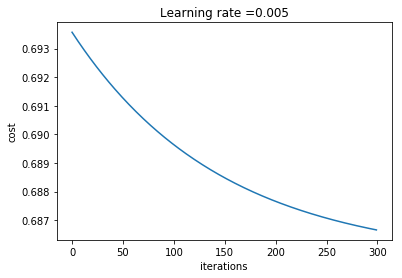

Cost in single layer perceptron: 0.6866617880496284


In [4]:
#1(a) Single Layer Perceptron
print("Cost in single layer perceptron: " +str( L_layer_model(input_data.T,output_data.T,[2,7,1])[1][-1]))





In [6]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    return predictions

def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
     
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache
    


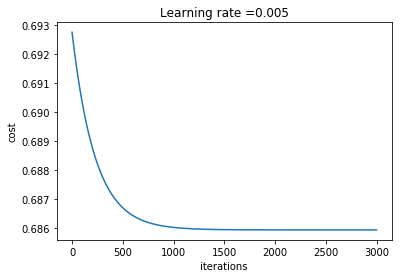

Cost in multiple layer perceptron: 0.6859298144723724


In [7]:
 #1(b) Mulitple Layer Perceptron:
print("Cost in multiple layer perceptron: " +str( L_layer_model(input_data.T,output_data.T,[2,50,20,10,3,1], num_iterations=3000)[1][-1]))


1(c).
Multiple layer neural networks usually give lesser error.
Since single layer neural networks have one one hidden layer, they only approxiate data well on linear scales. Therefore the data is underfitted.
In the case of multiple layer networks, the network is modeled on multiple hidden layers. Therefore, data is approximated on non-linear scales. Therefore the data is overfitted, and the error is reduced.


2(a). Same weights.
In this case all the neurons will calculate the exact same output; as wieghts are the same. 
Therefore this will act the same as a single layer neural network.

2(b). Large weights.
Large weights will give us a better chance of landing on a more gradual slops of the activation function. Therefore our weight updates will be slower, than  if we update on small weights.
